## Import dependencies

In [1]:
import pytorch_lightning as pl
import sys
sys.path.append('../')


import src.data.dataset as dataset
import src.models.glucose_insulin as gi
import src.utils.utils as utils

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Load pretrained models

In [3]:
loaded_model = utils.load_model(gi.GIModel, '../pretrained_models/gamma_model.pth', lr=0.01)
for name, param in loaded_model.named_parameters():
    print(f"Parameter: {name}, Value: {param.data}")

Model loaded from ../pretrained_models/gamma_model.pth
Parameter: p1, Value: 0.4935648739337921
Parameter: p2, Value: 0.885363757610321
Parameter: p3, Value: -0.08541222661733627
Parameter: p4, Value: -0.08431708812713623
Parameter: p5, Value: 97.71422576904297
Parameter: p6, Value: 0.8853634595870972
Parameter: Gb, Value: 77.9916000366211
Parameter: Ib, Value: 14.797350883483887
Parameter: nutrition_model.k, Value: tensor([ 9.6189,  7.4940,  9.2239,  8.9730, 10.0118, 10.0031])
Parameter: nutrition_model.theta, Value: tensor([2.4237, 1.3567, 2.0240, 1.7909, 2.8142, 2.6898])


## Load finetune and test dataset

In [4]:
finetune_dataset= dataset.GlucoseRecordings(gv_recordings_path='../data/user-2133-037/finetune.tsv')
finetune_loader = finetune_dataset.get_data_loader()

test_dataset= dataset.GlucoseRecordings(gv_recordings_path='../data/user-2133-037/test.tsv')

## Fine tune the model

In [5]:
loss_logger = utils.LossLogger()
trainer = pl.Trainer(max_epochs=50, callbacks=[loss_logger])
trainer.fit(loaded_model, finetune_loader)
for name, param in loaded_model.named_parameters():
    print(f"Parameter: {name}, Value: {param.data}")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type                | Params | Mode 
----------------------------------------------------------------
0 | nutrition_model | GammaNutritionModel | 12     | train
1 | loss_fn         | MSELoss             | 0      | train
  | other params    | n/a                 | 8      | n/a  
----------------------------------------------------------------
20        Trainable params
0         Non-trainable params
20        Total params
0.000     Total estimated model params size (MB)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\l

Epoch 49: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s, v_num=10, train_loss_step=82.30, train_loss_epoch=176.0]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s, v_num=10, train_loss_step=82.30, train_loss_epoch=176.0]
Parameter: p1, Value: 0.8520041108131409
Parameter: p2, Value: 0.7886523008346558
Parameter: p3, Value: -0.0020859823562204838
Parameter: p4, Value: -0.0011598459677770734
Parameter: p5, Value: 97.64396667480469
Parameter: p6, Value: 0.7886519432067871
Parameter: Gb, Value: 76.96490478515625
Parameter: Ib, Value: 14.410181999206543
Parameter: nutrition_model.k, Value: tensor([ 9.2776,  8.6827,  9.3421,  9.4174, 10.1463,  9.2846])
Parameter: nutrition_model.theta, Value: tensor([1.8631, 2.4353, 1.7382, 1.6775, 3.1662, 1.7857])


## Plot finetune loss

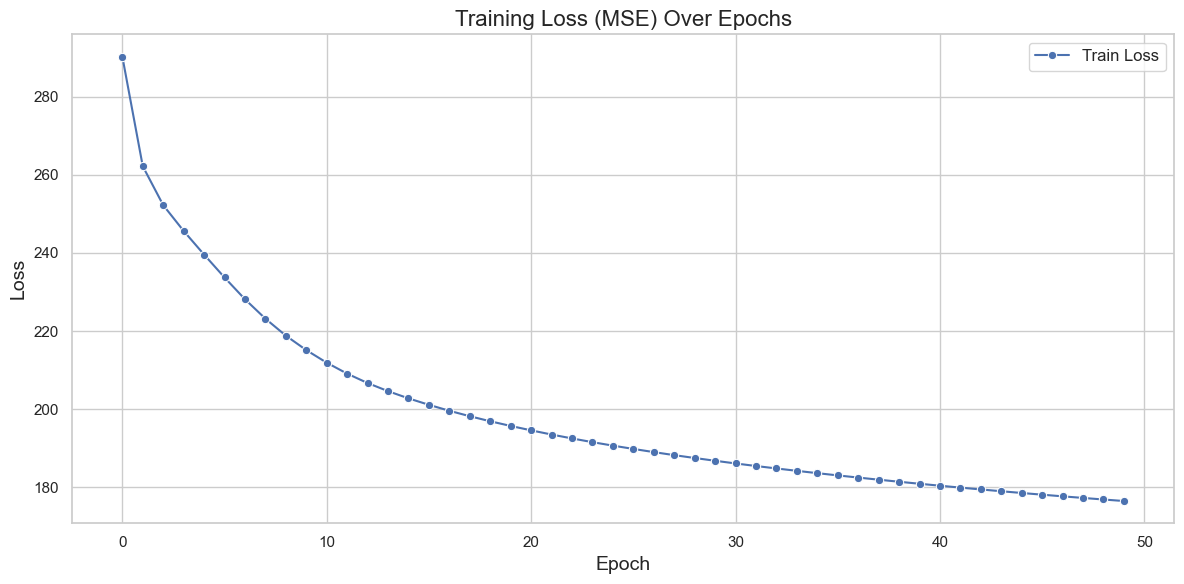

In [6]:
loss_logger.plot_losses()

## Evaluate and plot prediction on test dataset

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     134.0291290283203     │
└───────────────────────────┴───────────────────────────┘

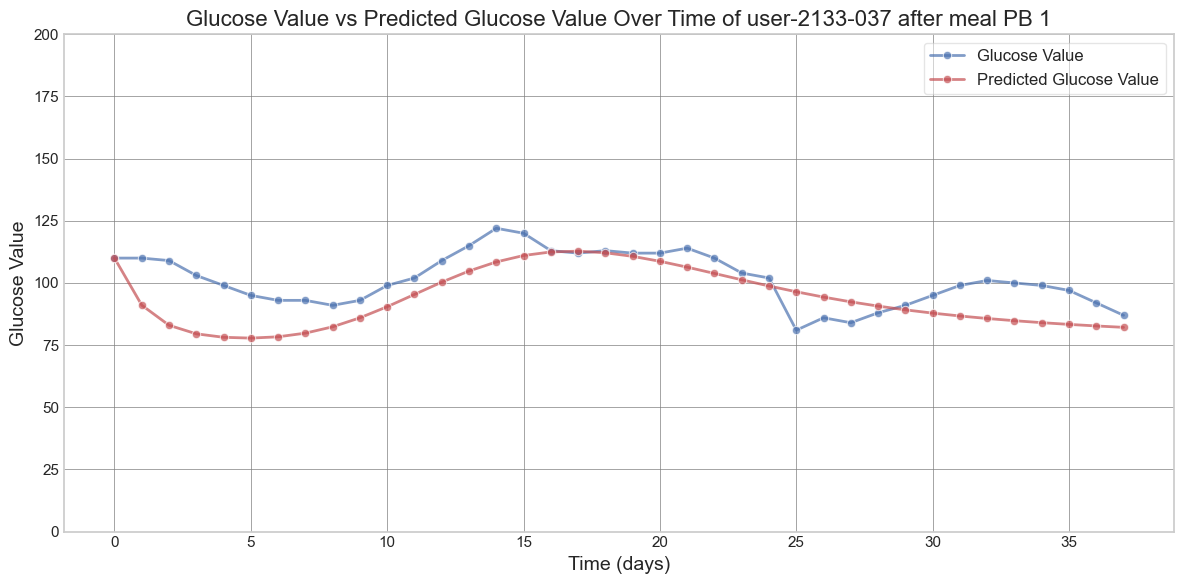

In [8]:
trainer.test(loaded_model, test_dataset.get_data_loader())
loaded_model.plot_prediction(test_dataset[0], 'user-2133-037', 'PB 1', filename="test-2133-037-PB1.png")